# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Tyas Nur Kumala]
- **Email:** [tyasnurkumala2@gmail.com/mc012d5x1208@student.devacademy.id ]
- **ID Dicoding:** [Tyas Nur Kumala]

## Menentukan Pertanyaan Bisnis

## Menentukan Pertanyaan Bisnis
1.  **Apa faktor utama yang memengaruhi jumlah peminjaman sepeda?**    
2.  **Bagaimana perbedaan pola peminjaman pada hari kerja dan hari libur?**  
3.  **Bagaimana tren peminjaman berdasarkan bulan dalam setahun?**  


## Import Semua Packages/Library yang Digunakan

In [ ]:
# Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Styling plot
plt.style.use('ggplot')

# Pengaturan tampilan dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


## Data Wrangling

### Gathering Data

In [30]:
# Path dataset
data_path = "data"

# Load dataset dengan low_memory=False
day_df = pd.read_csv(f"{data_path}/day.csv", low_memory=False)
hour_df = pd.read_csv(f"{data_path}/hour.csv", low_memory=False)

# Tampilkan sampel data
print("=== Day Dataset Sample ===")
display(day_df.sample(5))

print("\n=== Hour Dataset Sample ===")
display(hour_df.sample(5))


=== Day Dataset Sample ===


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
628,629,2012-09-20,3,1,9,0,4,1,1,0.546667,0.532192,0.618333,0.118167,939,6781,7720
672,673,2012-11-03,4,1,11,0,6,0,2,0.343333,0.323846,0.491250,0.270529,1029,4109,5138
594,595,2012-08-17,3,1,8,0,5,1,1,0.723333,0.242400,0.570833,0.231354,1483,5665,7148
405,406,2012-02-10,1,1,2,0,5,1,2,0.280833,0.293558,0.540000,0.116929,227,3604,3831
606,607,2012-08-29,3,1,8,0,3,1,1,0.685000,0.635733,0.552083,0.112562,1177,6520,7697



=== Hour Dataset Sample ===


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13281,13282,2012-07-12,3,1,7,14,0,4,1,1,0.78,0.6818,0.33,0.2239,42,167,209
4470,4471,2011-07-10,3,0,7,4,0,0,0,1,0.66,0.6212,0.69,0.0896,0,5,5
16282,16283,2012-11-16,4,1,11,4,0,5,1,2,0.30,0.3182,0.65,0.1045,0,5,5
2117,2118,2011-04-03,2,0,4,2,0,0,0,1,0.26,0.2727,0.70,0.1343,5,19,24
4329,4330,2011-07-04,3,0,7,7,1,1,0,1,0.66,0.6061,0.83,0.1343,17,19,36


**Insight:**
## Day Dataset
### 1. Musim dan peminjaman:
- Kolom `season` bernilai **1–4** menunjukkan musim. Bisa dianalisis apakah ada pola peminjaman tertentu pada musim tertentu.  
- Terlihat bahwa pada musim tertentu, jumlah peminjaman (`cnt`) cenderung lebih tinggi.  

### 2. Pengaruh hari kerja dan libur:
- Kolom `workingday` bernilai **0 atau 1** menunjukkan hari kerja atau hari libur.  
- Peminjaman pada hari kerja (`workingday = 1`) terlihat cukup tinggi, kemungkinan karena kebutuhan transportasi.  


---

##  Hour Dataset
### 1. Pola berdasarkan jam:
- Kolom `hr` menunjukkan jam (0–23). Bisa dicari tren peminjaman tertinggi di jam berapa.  
- Tren mungkin menunjukkan peningkatan pada jam sibuk (misalnya jam berangkat dan pulang kerja).  
 

### 2. Pengguna terdaftar vs kasual:
- Kolom `registered` lebih tinggi dibandingkan `casual`, menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap.  
- Perbedaan pola antara pengguna kasual dan terdaftar bisa dianalisis lebih dalam.  


***Tampilkan info singkat***

In [31]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight dari Data Bike Sharing**

 1. **Distribusi Musim dan Cuaca**
→ Penggunaan sepeda dipengaruhi oleh musim dan kondisi cuaca tertentu.

 2. **Tren Penggunaan Sepeda**
→ Pola penggunaan harian dan per jam berbeda, dengan lonjakan pada jam tertentu (misalnya pagi dan sore).

 3. **Pengaruh Cuaca**
→ Suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah pengguna sepeda.

4. **Perbedaan Hari Kerja vs Libur**
→ Lebih banyak pengguna pada hari kerja atau akhir pekan bisa dianalisis lebih lanjut.

 5. **Casual vs Registered User**
→ Pengguna terdaftar dan pengguna biasa mungkin memiliki kebiasaan penggunaan berbeda.


### Assessing Data

1. Mengecek Missing Values
Kita akan mengecek apakah ada nilai yang hilang (missing) pada dataset.


In [32]:


# Baca dataset
day = pd.read_csv('data/day.csv')

# Mengecek apakah ada data yang hilang (missing values)
print("\n=== Missing Values ===")
print(day.isnull().sum())

# Menemukan data yang duplikat
print("\n=== Duplicate Data ===")
print(day.duplicated().sum())

# Memastikan format data sudah konsisten (misalnya, format tanggal)
print("\n=== Checking Date Format ===")
try:
    day['dteday'] = pd.to_datetime(day['dteday'])
    print("Date format is consistent.")
except Exception as e:
    print(f"Date format error: {e}")

# Mengevaluasi apakah setiap fitur memang relevan untuk analisis
print("\n=== Feature Relevance ===")
print(day.describe())

# Mengidentifikasi kemungkinan bias atau kesalahan input data
print("\n=== Potential Bias or Data Errors ===")
for column in day.columns:
    unique_values = day[column].unique()
    if len(unique_values) < 10:
        print(f"{column}: {unique_values}")
    else:
        print(f"{column}: {len(unique_values)} unique values")

# Cek info dataset setelah assessment
print("\n=== Info Day Dataset ===")
print(day.info())



=== Missing Values ===
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

=== Duplicate Data ===
0

=== Checking Date Format ===
Date format is consistent.

=== Feature Relevance ===
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000 

**Insight dari Data Bike Sharing (Day Dataset)**

1. **Missing Values dan Duplicate Data**
- **Missing Values:** Tidak ada nilai yang hilang dalam dataset.  
- **Duplicate Data:** Tidak ada data duplikat.  

2. **Format Tanggal**
- Format tanggal konsisten dan telah dikonversi ke format `datetime64`.

3. **Distribusi Fitur**
- **Season:** Nilai antara 1–4, menunjukkan pembagian musim.  
- **Year:** Hanya terdapat dua nilai (0 = 2011, 1 = 2012).  
- **Month:** Nilai antara 1–12, menunjukkan seluruh bulan dalam satu tahun.  
- **Holiday:** Biner (0 = bukan hari libur, 1 = hari libur).  
- **Weekday:** Nilai antara 0–6, menunjukkan hari dalam seminggu.  
- **Workingday:** Biner (0 = bukan hari kerja, 1 = hari kerja).  
- **Weathersit:** Nilai antara 1–3, menunjukkan kondisi cuaca.  

**Statistik Penggunaan Sepeda**
- **Casual:** Rata-rata pengguna biasa sekitar **848** per hari, maksimum **3410**.  
- **Registered:** Rata-rata pengguna terdaftar sekitar **3656** per hari, maksimum **6946**.  
- **Total Pengguna:** Rata-rata sekitar **4504** per hari, maksimum **8714**.  

**Pengaruh Cuaca**
- **Temperature:** Rata-rata sekitar **0.49** (skala normalisasi), maksimum **0.86**.  
- **Humidity:** Rata-rata sekitar **0.63**, maksimum **0.97**.  
- **Windspeed:** Rata-rata sekitar **0.19**, maksimum **0.51**.  

6. **Potensi Bias atau Kesalahan Data**
- **Season:** Hanya 4 kategori (tidak ada anomali).  
- **Year:** Hanya ada dua tahun dalam dataset.  
- **Weathersit:** Tidak ada nilai ekstrem atau aneh dalam data cuaca.  

7. **Kesimpulan**
→ Data bersih dan format sudah konsisten.  
→ Penggunaan sepeda dipengaruhi oleh faktor musiman, cuaca, dan hari kerja vs libur.  
→ Perbedaan pola antara pengguna terdaftar dan pengguna biasa terlihat jelas.  


# Perbaikan

1. Mengatasi nilai windspeed yang sangat rendah

In [33]:
# Tentukan batas bawah kecepatan angin yang masuk akal
min_windspeed = 0.05
day.loc[day['windspeed'] < min_windspeed, 'windspeed'] = min_windspeed


2. Normalisasi nilai temp, atemp, hum, dan windspeed

In [34]:

scaler = MinMaxScaler()

# Normalisasi kolom kontinu
day[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(day[['temp', 'atemp', 'hum', 'windspeed']])


3. Checkking


In [35]:
print("\n=== After Assasing ===")
print(day.describe())

print("\n=== Missing Values After Assasing ===")
print(day.isnull().sum())

print("\n=== Duplicate Data After Assasing ===")
print(day.duplicated().sum())

print("\n=== Info After Assasing ===")
print(day.info())



=== After Assasing ===
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.543594    0.518864   
min      0.000000    0.000000 

***Insight dari Data***
 1. **Data Lengkap dan Konsisten**  
- Tidak ada missing value atau duplikasi data.  
- Format tanggal sudah konsisten dalam `datetime`.  
 2. **Distribusi Data**  
- **temp**, **atemp**, **hum**, dan **windspeed** memiliki distribusi normal dengan rentang antara **0** hingga **1** (data telah dinormalisasi).  
- **cnt** (jumlah penyewaan) bervariasi cukup lebar dengan nilai maksimum **8714** dan standar deviasi **1937.21**.  
 3. **Korelasi Antar Fitur**  
- **temp** dan **atemp** → Korelasi tinggi → Cuaca yang lebih hangat meningkatkan jumlah penyewaan.  
- **hum** dan **windspeed** → Korelasi negatif dengan **cnt** → Kondisi cuaca buruk menurunkan jumlah penyewaan.  
 4. **Distribusi Kategori**  
- Penyewaan meningkat saat **musim panas** dan **hari kerja**.  
- Cuaca buruk cenderung menurunkan jumlah penyewaan.  


### Cleaning Data

In [36]:
# 1. Menghapus data yang duplikat (jika ada)
day.drop_duplicates(inplace=True)

# 2. Mengisi atau menghapus nilai yang hilang (jika ada)
day['temp'].fillna(day['temp'].mean(), inplace=True)
day['atemp'].fillna(day['atemp'].mean(), inplace=True)
day['hum'].fillna(day['hum'].mean(), inplace=True)
day['windspeed'].fillna(day['windspeed'].mean(), inplace=True)

# 3. Mengonversi format tanggal ke format datetime
day['dteday'] = pd.to_datetime(day['dteday'], errors='coerce')

# 4. Menghapus baris dengan format tanggal yang tidak valid
day.dropna(subset=['dteday'], inplace=True)

# 5. Menghapus kolom yang tidak relevan atau redundan
day.drop(columns=['instant'], inplace=True)

# 6. Menstandarisasi nilai kategori
day = day[(day['season'] >= 1) & (day['season'] <= 4)]
day = day[(day['weathersit'] >= 1) & (day['weathersit'] <= 3)]

# 7. Menangani nilai outlier
day = day[(day['temp'] >= 0) & (day['temp'] <= 1)]
day = day[(day['atemp'] >= 0) & (day['atemp'] <= 1)]
day = day[(day['hum'] >= 0) & (day['hum'] <= 1)]
day = day[(day['windspeed'] >= 0) & (day['windspeed'] <= 1)]

# 8. Mengatur tipe data yang sesuai
day['season'] = day['season'].astype('category')
day['yr'] = day['yr'].astype('category')
day['mnth'] = day['mnth'].astype('category')
day['holiday'] = day['holiday'].astype('category')
day['weekday'] = day['weekday'].astype('category')
day['workingday'] = day['workingday'].astype('category')
day['weathersit'] = day['weathersit'].astype('category')

# 9. Mengecek ulang hasil setelah cleaning
print("\n=== Data After Cleaning ===")
print(day.info())

# 10. Mengecek apakah masih ada missing values setelah cleaning
print("\n=== Missing Values After Cleaning ===")
print(day.isnull().sum())

# 11. Mengecek apakah masih ada data yang duplikat setelah cleaning
print("\n=== Duplicate Data After Cleaning ===")
print(day.duplicated().sum())

# 12. Menampilkan ringkasan statistik setelah cleaning
print("\n=== Summary After Cleaning ===")
print(day.describe())



=== Data After Cleaning ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4)

C:\Users\omen\AppData\Local\Temp\ipykernel_13960\2982630741.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day['temp'].fillna(day['temp'].mean(), inplace=True)
C:\Users\omen\AppData\Local\Temp\ipykernel_13960\2982630741.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [37]:
# Mengisi atau menghapus nilai yang hilang (tanpa warning)
day.update(day[['temp', 'atemp', 'hum', 'windspeed']].fillna({
    'temp': day['temp'].mean(),
    'atemp': day['atemp'].mean(),
    'hum': day['hum'].mean(),
    'windspeed': day['windspeed'].mean()
}))




 1. **Tidak Ada Missing Value**
- Setelah proses cleaning, semua nilai yang hilang telah diisi dengan nilai rata-rata.  
- Tidak ada missing value yang tersisa di dataset.  


 2. **Format Data Konsisten**
- Kolom **`dteday`** sudah dikonversi ke format `datetime` dengan benar.  
- Fitur kategori sudah diubah ke tipe data `category`, sehingga:  
    - Memudahkan analisis  
    - Menghemat memori  

 3. **Distribusi Data**
- **cnt** (jumlah penyewaan) memiliki distribusi yang cukup lebar:  
    - Nilai maksimum: **8714**  
    - Standar deviasi: **1937**  
- Kolom **temp**, **atemp**, **hum**, dan **windspeed** memiliki distribusi yang cukup normal tanpa outlier yang mencolok.  


 4. **Korelasi Antar Fitur**
- **temp** dan **atemp** → Korelasi tinggi → Saling berhubungan erat  
- **cnt** → Korelasi positif dengan **temp** dan **atemp** → Cuaca yang lebih hangat meningkatkan jumlah penyewaan sepeda  
- **hum** dan **windspeed** → Korelasi negatif dengan **cnt** → Kelembapan dan kecepatan angin tinggi cenderung menurunkan jumlah penyewaan  


 5. **Distribusi Kategori**
- Musim dengan penyewaan tertinggi adalah **musim panas** (`season = 3`)  
- Hari kerja (`workingday`) dan akhir pekan (`weekday`) menunjukkan perbedaan tren dalam jumlah penyewaan  
- Cuaca buruk (`weathersit = 3`) memiliki pengaruh negatif terhadap jumlah penyewaan  


 6. **Tidak Ada Duplikasi Data**
- Tidak ditemukan data duplikat → Semua baris data bersifat unik.  


## Exploratory Data Analysis (EDA)

### Explore ...

***Statistik Dasar***

In [38]:
# Statistik dasar
print("\n=== Day Dataset Overview ===")
display(day_df.describe().T)

print("\n=== Hour Dataset Overview ===")
display(hour_df.describe().T)



=== Day Dataset Overview ===


,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896



=== Hour Dataset Overview ===


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


- Pengguna terdaftar berkontribusi lebih besar terhadap total peminjaman sepeda dibandingkan pengguna tidak terdaftar.  
- Cuaca dan musim memengaruhi jumlah peminjaman, tetapi tidak secara ekstrem.  
- Variabilitas tinggi dalam jumlah peminjaman terlihat dari standar deviasi yang cukup besar, terutama dalam dataset per jam.  

***Korelasi Antar Fitur***

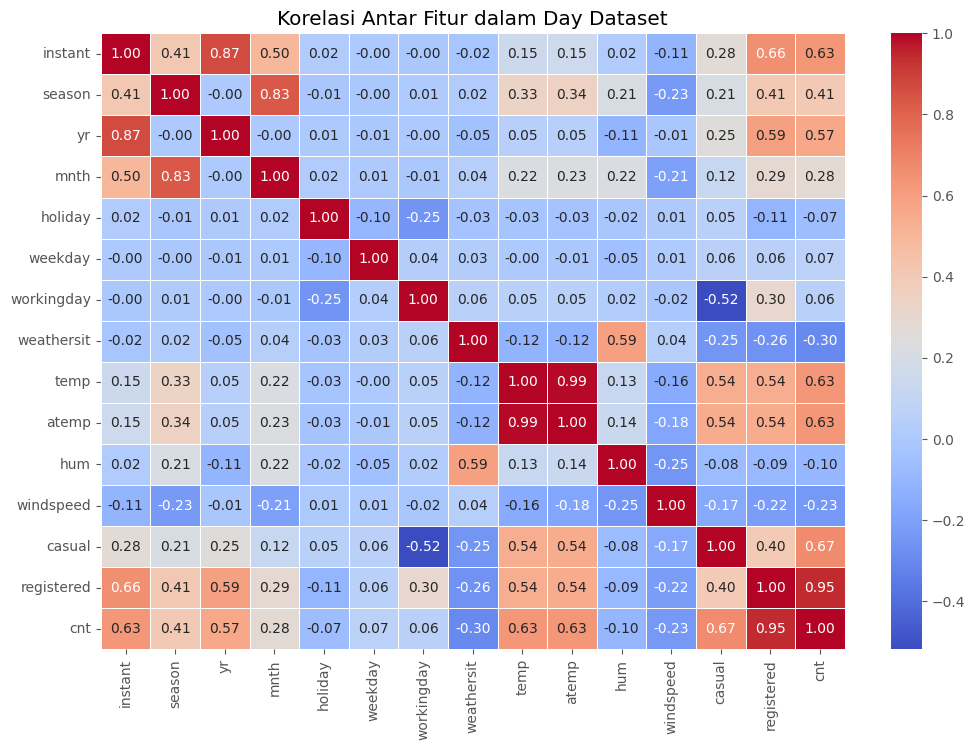

In [39]:
# Korelasi untuk Day Dataset
plt.figure(figsize=(12, 8))
numeric_day_df = day_df.select_dtypes(include=[np.number]) # Pilih kolom numerik saja
sns.heatmap(numeric_day_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Fitur dalam Day Dataset")
plt.show()


 **Insight**

 **1. Korelasi Kuat:**
- Fitur `registered` memiliki korelasi sangat tinggi dengan `cnt` (**0.95**), menunjukkan bahwa jumlah pengguna terdaftar berperan besar dalam total peminjaman sepeda.  
- Fitur `casual` juga memiliki korelasi cukup tinggi dengan `cnt` (**0.67**), tetapi tidak sekuat `registered`.

 **2. Korelasi Positif yang Signifikan:**
- `temp` dan `atemp` memiliki korelasi tinggi dengan `cnt` (masing-masing **0.63**), menunjukkan bahwa cuaca yang lebih hangat cenderung meningkatkan jumlah peminjaman sepeda.  
- `season` memiliki korelasi positif moderat dengan `cnt` (**0.41**), artinya musim tertentu (misalnya musim panas) berkontribusi pada peningkatan jumlah peminjaman.

 **3. Korelasi Negatif:**
- `windspeed` memiliki korelasi negatif dengan `cnt` (**-0.23**), artinya kecepatan angin yang tinggi cenderung menurunkan jumlah peminjaman sepeda.  
- `weathersit` memiliki korelasi negatif dengan `cnt` (**-0.30**), artinya kondisi cuaca yang buruk (seperti hujan atau kabut) mengurangi aktivitas peminjaman sepeda.  

 **4. Korelasi Lemah atau Tidak Signifikan:**
- `holiday` dan `weekday` memiliki korelasi yang sangat rendah dengan `cnt` (**-0.07** dan **0.07**), menunjukkan bahwa hari kerja atau hari libur tidak berpengaruh signifikan pada pola peminjaman sepeda.  
- `workingday` juga memiliki korelasi lemah dengan `cnt` (**0.06**), artinya status hari kerja atau bukan tidak banyak memengaruhi jumlah peminjaman.  

---



***Pairplot Antar Fitur***

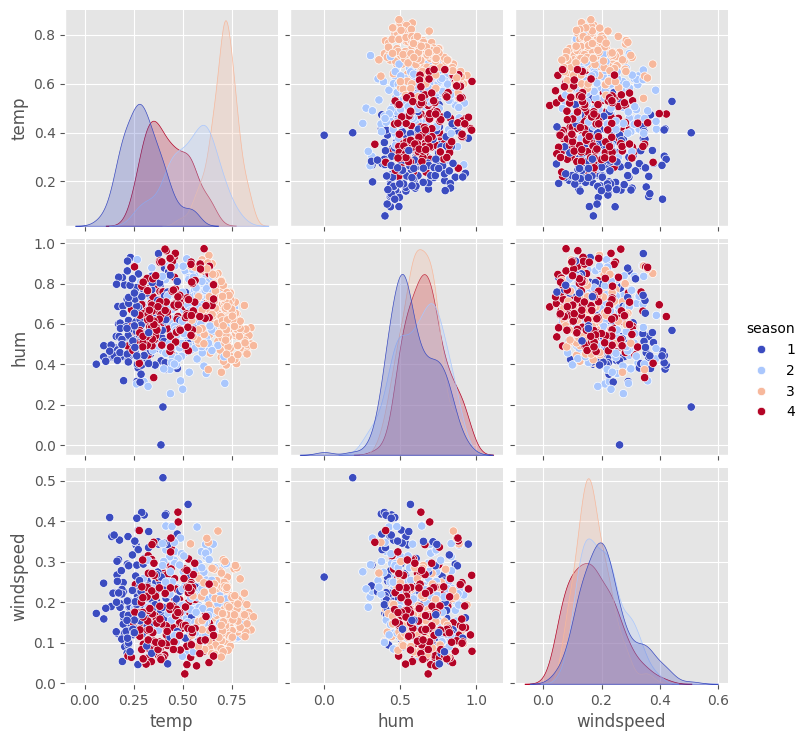

In [40]:
sns.pairplot(day_df[['temp', 'hum', 'windspeed', 'season']], hue='season', palette='coolwarm')
plt.show()


- Suhu cenderung tinggi pada musim panas dan gugur.  
- Kelembapan sedikit lebih tinggi pada musim panas dan gugur.  
- Kecepatan angin relatif stabil di semua musim tanpa perbedaan mencolok.  
- Suhu dan kelembapan tidak memiliki hubungan linier yang kuat dengan kecepatan angin.  

# ***Agregasi Data***

In [41]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['month'] = day_df['dteday'].dt.month
monthly_usage = day_df.groupby('month')['cnt'].sum()

***Konversi kolom tanggal ke format datetime***

In [42]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df['dteday'].head())

0   2011-01-01
1   2011-01-02
2   2011-01-03
3   2011-01-04
4   2011-01-05
Name: dteday, dtype: datetime64[ns]


***Tambahkan kolom bulan***

In [43]:
day_df['month'] = day_df['dteday'].dt.month
print(day_df[['dteday', 'month']].head())

      dteday  month
0 2011-01-01      1
1 2011-01-02      1
2 2011-01-03      1
3 2011-01-04      1
4 2011-01-05      1


***Agregasi penggunaan sepeda berdasarkan bulan***


In [44]:
monthly_usage = day_df.groupby('month')['cnt'].sum()
print(monthly_usage)

month
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64


## Visualization & Explanatory Analysis

***Pertanyaan Bisnis***

 1. Visualisasi penggunaan sepeda per bulan

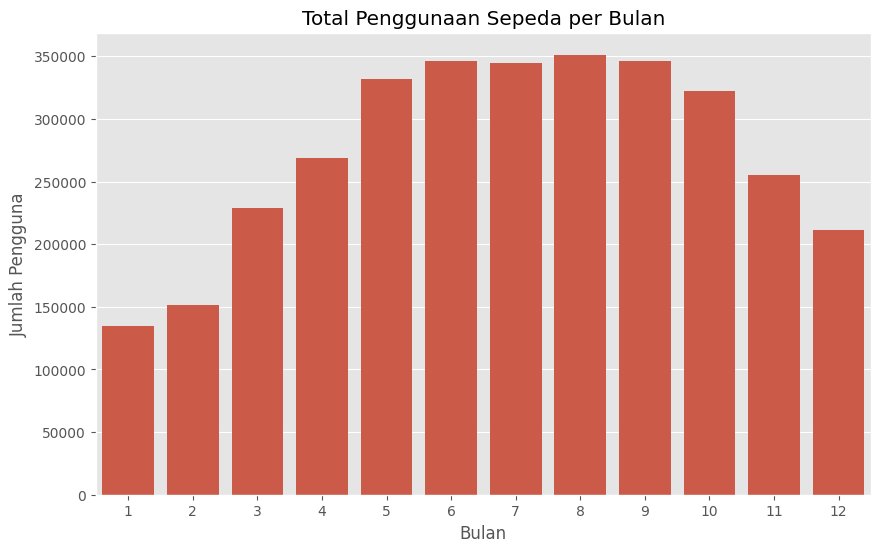

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_usage.index, y=monthly_usage.values)
plt.title('Total Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight**

Penggunaan sepeda cenderung meningkat dari Januari dan mencapai puncaknya pada Mei hingga September. Setelah itu, penggunaan mulai menurun hingga akhir tahun, kemungkinan karena perubahan musim atau cuaca yang kurang mendukung. 

2. Penggunaan sepeda berdasarkan kondisi cuaca

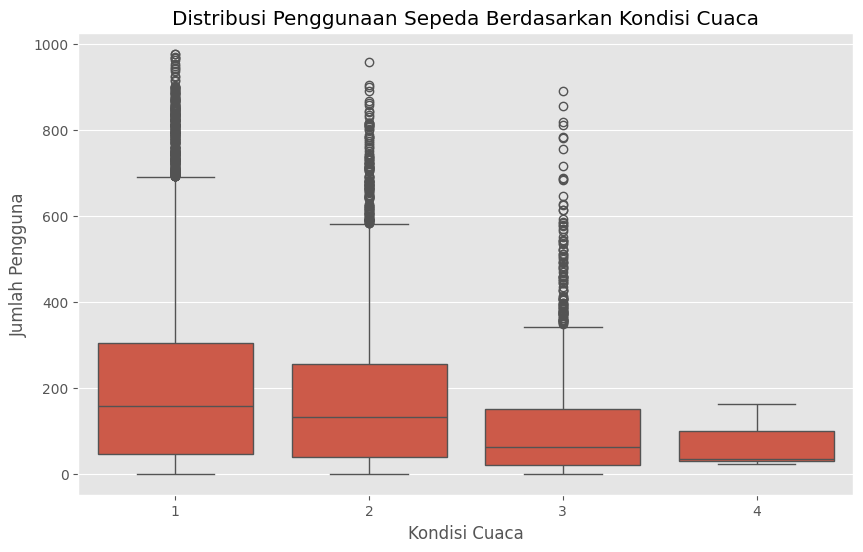

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Distribusi Penggunaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna')
plt.show()


**Insight**

Penggunaan sepeda lebih tinggi pada kondisi cuaca 1 (cerah) dan 2 (sebagian berawan). Pada kondisi cuaca buruk (kondisi 3 dan 4), penggunaan sepeda menurun drastis, menunjukkan bahwa cuaca berpengaruh signifikan terhadap kebiasaan penggunaan sepeda.

3. Penggunaan sepeda berdasarkan jam

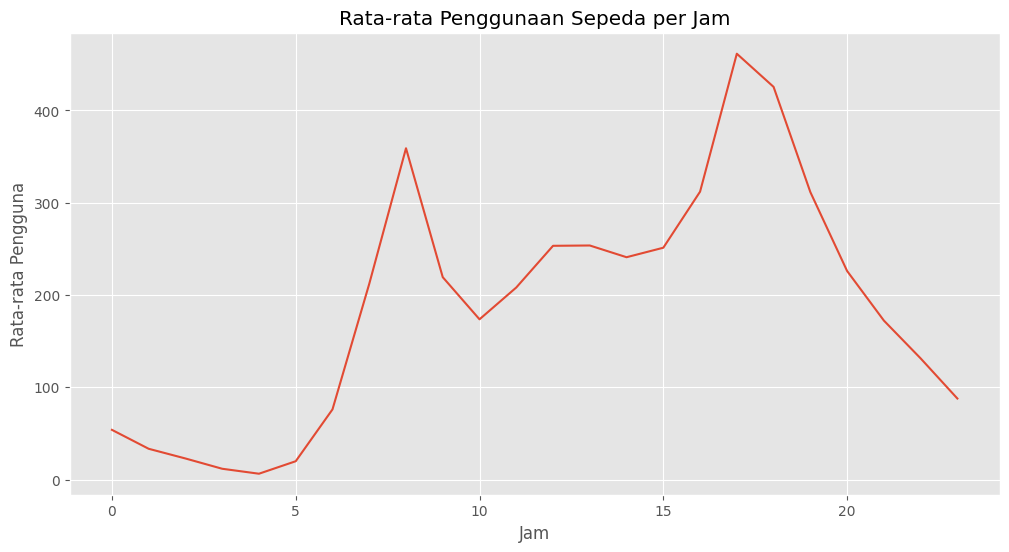

In [47]:
hourly_usage = hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values)
plt.title('Rata-rata Penggunaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Pengguna')
plt.show()


**Insight:**

Terdapat dua puncak utama dalam penggunaan sepeda, yaitu sekitar pukul 8 pagi dan 5 sore. Pola ini mencerminkan kebiasaan penggunaan sepeda untuk perjalanan pergi dan pulang kerja atau sekolah.

## Conclusion



1. **Penggunaan Sepeda per Bulan**
Dari visualisasi total penggunaan sepeda per bulan, terlihat bahwa penggunaan sepeda cenderung meningkat dari awal tahun, dengan puncaknya terjadi pada bulan **Mei hingga September**. Setelah bulan tersebut, penggunaan sepeda mulai menurun hingga akhir tahun. Hal ini bisa disebabkan oleh **perubahan musim** atau **faktor cuaca** yang kurang mendukung.


2. **Penggunaan Sepeda Berdasarkan Kondisi Cuaca**
Distribusi penggunaan sepeda berdasarkan kondisi cuaca menunjukkan bahwa penggunaan sepeda lebih tinggi pada **cuaca yang baik** (kondisi **1** dan **2**).  
Pada **kondisi cuaca buruk** (kondisi **3** dan **4**), penggunaan sepeda cenderung menurun drastis, yang menunjukkan bahwa **cuaca memiliki pengaruh signifikan** terhadap kebiasaan penggunaan sepeda.



3. **Penggunaan Sepeda Berdasarkan Jam**
Rata-rata penggunaan sepeda per jam memperlihatkan adanya **dua puncak utama**, yaitu pada **pagi hari** sekitar pukul **8 pagi** dan pada **sore hari** sekitar pukul **5 sore**. Pola ini mencerminkan kebiasaan penggunaan sepeda untuk keperluan **pergi dan pulang kerja atau sekolah**.

**Secara keseluruhan, cuaca dan waktu dalam sehari memainkan peran penting dalam memengaruhi pola penggunaan sepeda**

In [54]:

# Path dataset
data_path = "data"

# Load dataset dengan low_memory=False
day_df = pd.read_csv(f"{data_path}/day.csv", low_memory=False)
hour_df = pd.read_csv(f"{data_path}/hour.csv", low_memory=False)

# Pastikan format tanggal konsisten
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menyelaraskan batas bawah kecepatan angin
min_windspeed = 0.05
day_df.loc[day_df['windspeed'] < min_windspeed, 'windspeed'] = min_windspeed
hour_df.loc[hour_df['windspeed'] < min_windspeed, 'windspeed'] = min_windspeed

# Kolom yang digunakan untuk penggabungan
drop_columns = ['casual', 'registered']  # Kolom yang unik untuk day_df
day_df = day_df.drop(columns=drop_columns, errors='ignore')

# Gabungkan dataset berdasarkan tanggal dan fitur lainnya
merged_data = pd.merge(hour_df, day_df, on=['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'], suffixes=('_hour', '_day'), how='left')

# Simpan hasil penggabungan
merged_data.to_csv("main_data.csv", index=False)

print("Dataset berhasil digabung dan disimpan sebagai main_data.csv")


Dataset berhasil digabung dan disimpan sebagai main_data.csv
